In [1]:
import pandas as pd
ruta = './data/base.xlsx'
base = pd.read_excel(ruta)
print('Numero de columnas: ',len(base.columns))
print(base.columns)

Numero de columnas:  49
Index(['IP', 'Submission ID', 'Submission Date', 'ENCUESTADOR:',
       'Nombre y Apellido del ENCUESTADO:', 'Address Map Locator',
       'Voice Recorder', 'PROVINCIA', 'CANTÓN', 'PARROQUIA',
       'DIRECCIÓN / BARRIO', 'SECTOR', 'EDAD', 'GENERO', 'ETNIA',
       'NIVEL DE EDUCACIÓN', 'NIVEL SOCIOECONOMICO',
       '1. ¿Cómo percibe la gestión del Presidente de la República Daniel Noboa Azin?',
       '2. De las siguientes personas (mostrar papeleta física) ¿A cuál conoce?',
       '3. Si las elecciones fueran mañana ¿Cuán probable es que vote por los siguientes candidato... >> José Serrano',
       '3. Si las elecciones fueran mañana ¿Cuán probable es que vote por los siguientes candidato... >> Jorge<br />Escala',
       '3. Si las elecciones fueran mañana ¿Cuán probable es que vote por los siguientes candidato... >> Andrea Gonzaléz',
       '3. Si las elecciones fueran mañana ¿Cuán probable es que vote por los siguientes candidato... >> Víctor Aráuz',
      

In [2]:
columnas = ['IP','ID','Submission Data','Pollster','Nombre','Location','Voice Recorder','Provincia','Canton','Parroquia','Direccion','Sector','Edad','Genero','Etnia','Educacion','Nivel socioeconómico',
            'P1','P2'] + [f'P3.{i}' for i in range(1,18)] + ['P4','P5.1','P5.2','P5.3','P5.4','P6.1','P6.2','P7.1','P7.2','P8','P9','P10','P11']
base.columns = columnas
base.head()

,IP,ID,Submission Data,Pollster,Nombre,Location,Voice Recorder,Provincia,Canton,Parroquia,...,P5.3,P5.4,P6.1,P6.2,P7.1,P7.2,P8,P9,P10,P11
0,177.234.195.243,5999264293423055408,2024-08-19 20:27:09,Xtumbaco,Piero Barragan,Longitude: -79.7240\nLatitude: -1.9628,https://www.jotform.com/widget-uploads/voiceRe...,GUAYAS,Guayaquil,Ximena,...,NaN,NaN,"RC (Revolución Ciudadana, lista 5)",NaN,"RC (Revolución Ciudadana, lista 5)",NaN,2 Regular,"XavierLasso (Revolución Ciudadana RC), lista 5",Negativamente,Neutral
1,2800:bf0:8264:1206:f464:2f4b:4f9c:8786,5999261856877297798,2024-08-19 20:23:05,KPezo,Oswaldo Ramírez,Longitude: -79.8862\nLatitude: -2.1962,https://www.jotform.com/widget-uploads/voiceRe...,GUAYAS,Guayaquil,Ximena,...,Ninguno,NaN,NINGUNA,NaN,NINGUNA,NaN,3 Buena,Ninguno,Negativamente,Neutral
2,2800:430:1381:6eb5:1:0:a134:be00,5999260220042518273,2024-08-19 20:20:22,Xtumbaco,Leonel benitez,Longitude: -79.7240\nLatitude: -1.9628,https://www.jotform.com/widget-uploads/voiceRe...,GUAYAS,Guayaquil,Ximena,...,Luisa Gonzalez,NaN,"RC (Revolución Ciudadana, lista 5)",NaN,"RC (Revolución Ciudadana, lista 5)",NaN,1 Pésima,"XavierLasso (Revolución Ciudadana RC), lista 5",Negativamente,Neutral
3,177.234.195.243,5999257673428163442,2024-08-19 20:16:07,Xtumbaco,Diana benalcaza,Longitude: -79.8862\nLatitude: -2.1962,https://www.jotform.com/widget-uploads/voiceRe...,GUAYAS,Guayaquil,Ximena,...,NaN,Pésima gestión,"RC (Revolución Ciudadana, lista 5)",NaN,"RC (Revolución Ciudadana, lista 5)",NaN,2 Regular,"XavierLasso (Revolución Ciudadana RC), lista 5",Negativamente,De acuerdo
4,177.234.195.243,5999254653425529083,2024-08-19 20:11:05,Xtumbaco,Jose Palacios,Longitude: -79.8862\nLatitude: -2.1962,https://www.jotform.com/widget-uploads/voiceRe...,GUAYAS,Guayaquil,Ximena,...,NaN,No es confiable,"ADN (Acción Democrática Nacional, lista 7)",NaN,"RC (Revolución Ciudadana, lista 5)",NaN,1 Pésima,"Anabella Azín (Acción Democrática Nacional),li...",Negativamente,De acuerdo


In [3]:
base['Edad']

0       32
1       26
2       32
3       23
4       23
        ..
2874    46
2875    45
2876    34
2877    39
2878    39
Name: Edad, Length: 2879, dtype: int64

In [4]:
base['Provincia'] = base['Provincia'].str.upper()
base = base.fillna('')
base['Pesos'] = 1 

def verificar_subcadena(texto, subcadena):
    return str(subcadena) in str(texto)

def generaciones(n):
    if n <= 24:
        return "16-24 Años"
    elif n <= 34: 
        return "25-34 Años"
    elif n <= 44:
        return "35-44 Años"
    elif n <= 59:
        return "45-59 Años"
    else:
        return "60+ Años"

def dominio(n):
    if n in restoSierra:
        return 'Resto Sierra'
    elif n in restoCosta:
        return 'Resto Costa'
    elif n in Amazonia:
        return 'Amazonia'
    else:
        return n
    
restoSierra = ['TUNGURAHUA','CHIMBORAZO','LOJA','COTOPAXI','IMBABURA','CAÑAR','BOLIVAR','CARCHI']
restoCosta = ['EL ORO','ESMERALDAS','SANTO DOMINGO','SANTA ELENA','GALÁPAGOS','LOS RÍOS-QUEVEDO','LOS RIOS-BABAHOYO']
Amazonia = ['NAPO','MORONA SANTIAGO','ORELLANA','ZAMORA CH','PASTAZA','SUCUMBIOS']
GeneralResto = restoSierra + restoCosta + Amazonia

base['Generaciones'] = base['Edad'].copy().astype(int).apply(generaciones)
base['Dominio'] = base['Provincia'].copy().apply(dominio)
base['General'] = 'General'

/var/folders/0q/l5j608j10jq82grhg4m4pf0h0000gn/T/ipykernel_22813/2037918085.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=province_value_counts.index, y=province_value_counts.values, palette=sns.color_palette("Blues_d"))
/var/folders/0q/l5j608j10jq82grhg4m4pf0h0000gn/T/ipykernel_22813/2037918085.py:28: UserWarning: 
The palette list has fewer values (6) than needed (24) and will cycle, which may produce an uninterpretable plot.
  ax = sns.barplot(x=province_value_counts.index, y=province_value_counts.values, palette=sns.color_palette("Blues_d"))


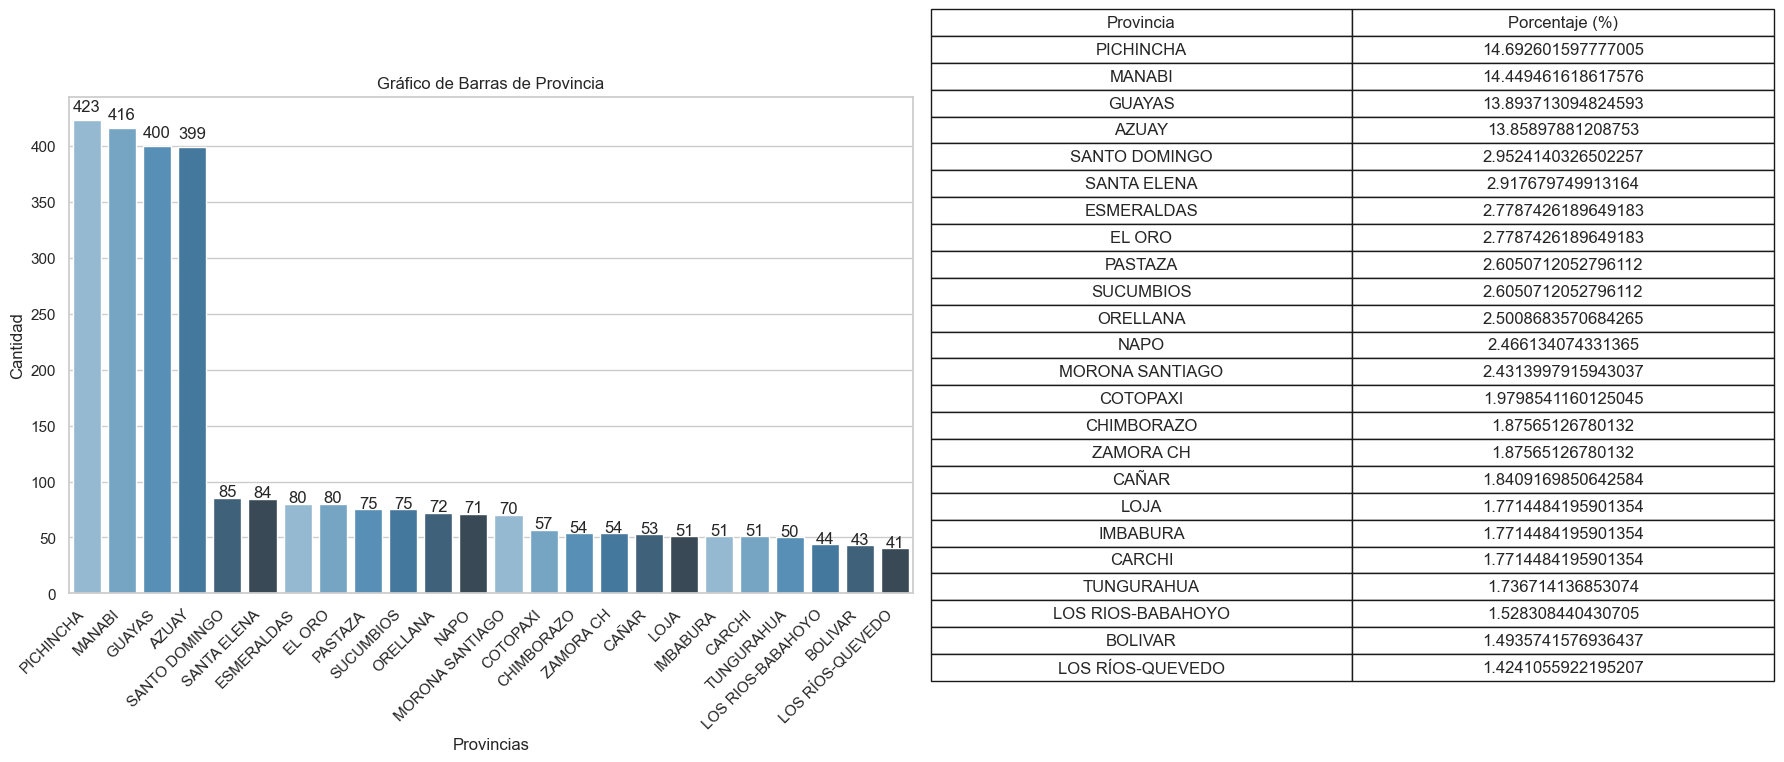

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Nombre de la columna
column_name = 'Provincia'

# Calculando los porcentajes de cada provincia
province_value_counts = base[column_name].value_counts()
total = province_value_counts.sum()
province_value_percentages = (province_value_counts / total) * 100
labels = list(province_value_counts.index)

# Crear un DataFrame para la tabla
table_data = pd.DataFrame({
    'Provincia': labels,
    'Porcentaje (%)': province_value_percentages.values
})

# Estableciendo el estilo de Seaborn
sns.set(style="whitegrid")

# Crear la figura principal
plt.figure(figsize=(18, 8))

# Primer subgráfico (gráfico de barras)
plt.subplot(1, 2, 1)
ax = sns.barplot(x=province_value_counts.index, y=province_value_counts.values, palette=sns.color_palette("Blues_d"))
ax.set_xlabel('Provincias')
ax.set_ylabel('Cantidad')
ax.set_title('Gráfico de Barras de ' + column_name)

# Rotar las etiquetas del eje x para mejor visibilidad
ax.set_xticks(range(len(province_value_counts)))
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# Añadir etiquetas de datos a las barras
for i, v in enumerate(province_value_counts.values):
    ax.text(i, v + v * 0.02, str(v), ha='center')

# Segundo subgráfico (Tabla de porcentajes)
plt.subplot(1, 2, 2)
plt.axis('off')  # Apagar el eje
table = plt.table(cellText=table_data.values, colLabels=table_data.columns, cellLoc='center', loc='center')
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1, 2)  # Ajustar el tamaño de la tabla

# Ajustar la disposición de la figura para evitar superposiciones
plt.tight_layout()

# Mostrar los gráficos y la tabla
plt.show()


In [6]:
base['Provincia'] = base['Provincia'].str.upper()
base = base.fillna('')
base['Pesos'] = 1 

def verificar_subcadena(texto, subcadena):
    return str(subcadena) in str(texto)

def generaciones(n):
    if n <= 24:
        return "16-24 Años"
    elif n <= 34: 
        return "25-34 Años"
    elif n <= 44:
        return "35-44 Años"
    elif n <= 59:
        return "45-59 Años"
    else:
        return "60+ Años"

def dominio(n):
    if n in restoSierra:
        return 'Resto Sierra'
    elif n in restoCosta:
        return 'Resto Costa'
    elif n in Amazonia:
        return 'Amazonia'
    else:
        return n
    
restoSierra = ['TUNGURAHUA','CHIMBORAZO','LOJA','COTOPAXI','IMBABURA','CAÑAR','BOLIVAR','CARCHI']
restoCosta = ['EL ORO','ESMERALDAS','SANTO DOMINGO','SANTA ELENA','GALÁPAGOS','LOS RÍOS-QUEVEDO','LOS RIOS-BABAHOYO']
Amazonia = ['NAPO','MORONA SANTIAGO','ORELLANA','ZAMORA CH','PASTAZA','SUCUMBIOS']
GeneralResto = restoSierra + restoCosta + Amazonia

base['Generaciones'] = base['Edad'].copy().astype(int).apply(generaciones)
base['Dominio'] = base['Provincia'].copy().apply(dominio)
base['General'] = 'General'

In [7]:
from datetime import datetime
listaPreguntas = ['P1','P2'] + [f'P3.{i}' for i in range(1,18)] + ['P4','P5.2','P5.3','P5.4','P6.1','P7.1','P7.2','P8','P9','P10','P11']

print(base.shape[0])

df_list = []
diccionario = {}
diccionarioPreguntas = {}
for k in listaPreguntas:
    nombrePregunta = k
    b = pd.DataFrame()
    b[nombrePregunta] = base[nombrePregunta].astype(str)
    preguntaExpandida = b[nombrePregunta].str.split(';',expand= True)
    lista = []
    for i in range(preguntaExpandida.shape[1]):
        lista += list(preguntaExpandida[i].unique())
    lista = list(set(lista))
    opciones = {str(i+1):lista[i] for i in range(len(lista))}
    new_columns = {nombrePregunta:b[nombrePregunta]}  # a dictionary to hold new column data
    listaColumnas = []
    for clave,valor in opciones.items():
        listaColumnas.append(k+'.'+str(clave))
        new_columns[k+'.'+str(clave)] = b[nombrePregunta].apply(lambda x: verificar_subcadena(x,valor)).values
        diccionario[k+'.'+str(clave)] = valor
    diccionarioPreguntas[nombrePregunta] = listaColumnas
    df_list.append(pd.DataFrame(new_columns))

# Combine all dataframes at once
result_df = pd.concat(df_list, axis=1)
result_df = pd.concat([base[['General','Provincia','Educacion','Nivel socioeconómico','Dominio','Generaciones','Edad','Genero','Pesos']],result_df],axis=1).fillna('')
Respuestas = {}
for key in list(diccionarioPreguntas.keys()):
    Pregunta = key
    Filtros = ['General','Dominio','Generaciones','Genero','Nivel socioeconómico','Educacion']
    Final2 = []
    for t in Filtros:
        columna = t
        Final = []
        unicosColumna = sorted(list(result_df[columna].unique()))
        for k in [[elemento] for elemento in unicosColumna]:
            a = result_df[result_df[columna].isin(k)]
            columnaResultado = pd.DataFrame()
            etiquetas = []
            valores = []
            for i in diccionarioPreguntas[Pregunta]:
                etiquetas.append(diccionario[i])
                valores.append((a[diccionarioPreguntas[Pregunta]][i]*a['Pesos']).sum()/a['Pesos'].sum())
            Final.append(pd.DataFrame({'Opciones':etiquetas,k[0]:valores}).sort_values(by=k[0],ascending=False))
        Aux = Final[0]
        for i in range(1,len(Final)):
            Aux =pd.merge(Aux,Final[i],on='Opciones',how='outer')
        Final2.append(Aux)
    Aux2 = Final2[0]
    for i in range(1,len(Final2)):
        Aux2 =pd.merge(Aux2,Final2[i],on='Opciones',how='outer')
    Respuestas[key] = Aux2 # El diccionario almacena tablas con las respuestas por preguntos
Aux = pd.DataFrame()
for i in Respuestas.keys():
    z = Respuestas[i]
    z['Pregunta']=i
    Aux = pd.concat([Aux,z])
Aux.to_excel('Resultados.xlsx',index=False)
print('Analisis concluido con exito')

2879
Analisis concluido con exito
